# 0.0 - Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [2]:
warnings.filterwarnings("ignore")


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mt.mean_squared_error(y_true, y_pred))

# 1.0 - Load Data

In [3]:
# Train Dataset
X_train = pd.read_csv("../data/regression_X_training.csv")
y_train = pd.read_csv("../data/regression_y_training.csv")

# Validation Dataset
X_val = pd.read_csv("../data/regression_X_validation.csv")
y_val = pd.read_csv("../data/regression_y_validation.csv")

# Test Dataset
X_test = pd.read_csv("../data/regression_X_test.csv")
y_test = pd.read_csv("../data/regression_y_test.csv")

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 - Polynomial Regression - Lasso

## Parameteres:
- `degree`
- `alpha`
- `max_iter`

## 2.1 - Performance for Train Dataset

In [5]:
# Define polynomial model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)

# Train and Fit Model
poly_lasso = Lasso(random_state=42)
poly_lasso.fit(X_poly_train, y_train)

# Predict
y_pred_train = poly_lasso.predict(X_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.009149935251170582
Train MSE: 473.6387760067563
Train RMSE: 21.763243692215468
Train MAE: 17.285449661261286
Train MAPE: 8.699700898061744


## 2.2 - Performance for Validation Dataset

In [6]:
# Define polynomial model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

# Train and Fit Model
poly_lasso = Lasso(random_state=42)
poly_lasso.fit(X_poly_train, y_train)

# Predict
y_pred_val = poly_lasso.predict(X_poly_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.009631007774810185
Validation MSE: 472.91269390919564
Validation RMSE: 21.746555909136408
Validation MAE: 17.238378728440562
Validation MAPE: 8.681846557814456


## 2.3 - Hyperparameter Fine Tuning

### Degree

In [7]:
degree = np.arange(1, 6)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [8]:
for i in degree:
    # Define polynomial model
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_lasso = Lasso(random_state=42)
    poly_lasso.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_lasso.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Degree: {i}, RMSE: {rmse}")

Degree: 1, RMSE: 21.76573180289256


Degree: 2, RMSE: 21.746555909136408
Degree: 3, RMSE: 21.69690689620617
Degree: 4, RMSE: 21.959834979236327
Degree: 5, RMSE: 34.352644859649246


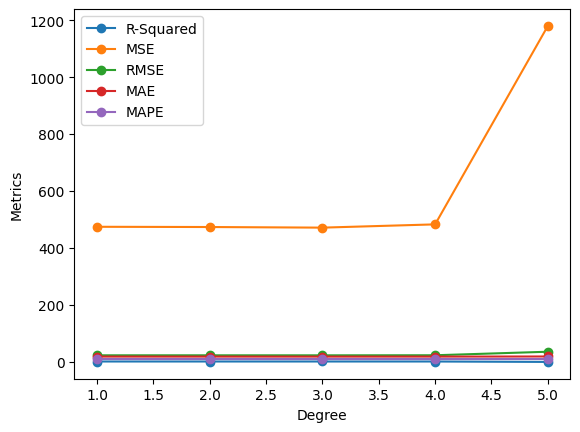

In [9]:
plt.plot(degree, r2_list, marker="o", label="R-Squared")
plt.plot(degree, mse_list, marker="o", label="MSE")
plt.plot(degree, rmse_list, marker="o", label="RMSE")
plt.plot(degree, mae_list, marker="o", label="MAE")
plt.plot(degree, mape_list, marker="o", label="MAPE")
plt.xlabel("Degree")
plt.ylabel("Metrics")
plt.legend()

In [10]:
best_degree = degree[np.argmin(mse_list)]
best_degree

3

### Alpha

In [11]:
alpha = np.arange(0.0, 5.0, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [12]:
for i in alpha:
    # Define polynomial model
    poly = PolynomialFeatures(degree=best_degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_lasso = Lasso(random_state=42, alpha=i)
    poly_lasso.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_lasso.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

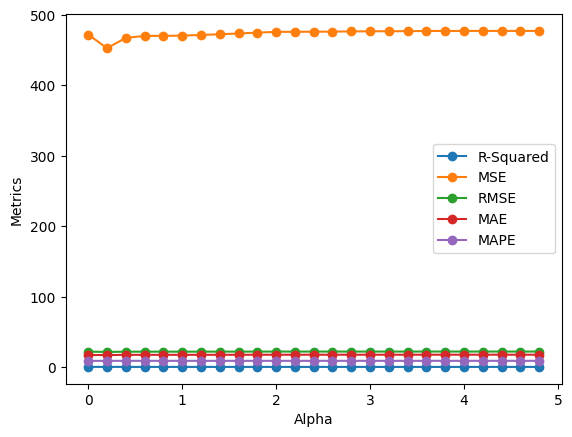

In [13]:
plt.plot(alpha, r2_list, marker="o", label="R-Squared")
plt.plot(alpha, mse_list, marker="o", label="MSE")
plt.plot(alpha, rmse_list, marker="o", label="RMSE")
plt.plot(alpha, mae_list, marker="o", label="MAE")
plt.plot(alpha, mape_list, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [14]:
best_alpha = alpha[np.argmin(mse_list)]
best_alpha

0.2

### Max Iter

In [15]:
max_iter = np.arange(400, 2100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [16]:
for i in max_iter:
    # Define polynomial model
    poly = PolynomialFeatures(degree=best_degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_lasso = Lasso(random_state=42, alpha=best_alpha, max_iter=i)
    poly_lasso.fit(X_poly_train, y_train)

    # Predict
    y_pred = poly_lasso.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

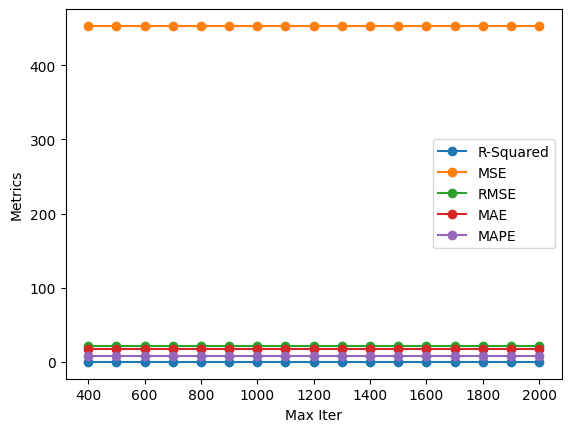

In [17]:
plt.plot(max_iter, r2_list, marker="o", label="R-Squared")
plt.plot(max_iter, mse_list, marker="o", label="MSE")
plt.plot(max_iter, rmse_list, marker="o", label="RMSE")
plt.plot(max_iter, mae_list, marker="o", label="MAE")
plt.plot(max_iter, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [18]:
best_iter = max_iter[np.argmin(mse_list)]
best_iter

400

## 2.4 - Performance for Test Dataset

In [19]:
# Define polynomial model
poly = PolynomialFeatures(degree=best_degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

# Train and Fit Model
poly_lasso = Lasso(random_state=42, alpha=best_alpha, max_iter=best_iter)
poly_lasso.fit(
    np.concatenate((X_poly_train, X_poly_val)), np.concatenate((y_train, y_val))
)
# Predict
y_pred_test = poly_lasso.predict(X_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.05624743375661545
Test MSE: 459.5140454998602
Test RMSE: 21.436278723226664
Test MAE: 17.016752837926244
Test MAPE: 8.575676598682453


# 3.0 - Save Results

In [20]:
train_metrics = {
    "Algorithm": "Polynomial Regression - Lasso",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Polynomial Regression - Lasso",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Polynomial Regression - Lasso",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)